In [1]:
import pandas as pd
import numpy as np

## Load Data

In [2]:
train = pd.read_csv('train.csv')
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
test = pd.read_csv('test.csv')
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


## Analyse Data

In [4]:
train.shape    # Rows and columns in the data are 7613, 5.

(7613, 5)

In [5]:
test.shape

(3263, 4)

In [6]:
x,y = train['target'].value_counts()  
print('Disaster took place : ',(y/(x+y)),'%')
print('Disaster did not took place : ',(x/(x+y)),'%')          # So the data is fairly balanced

Disaster took place :  0.4296597924602653 %
Disaster did not took place :  0.5703402075397347 %


In [7]:
train['keyword'].value_counts()

fatalities               45
deluge                   42
armageddon               42
sinking                  41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

In [8]:
test['keyword'].value_counts()

deluged               23
demolished            22
rubble                22
first%20responders    21
seismic               21
                      ..
threat                 5
fatalities             5
forest%20fire          5
inundation             4
epicentre              1
Name: keyword, Length: 221, dtype: int64

## Data Imputation and Stopword Removal

In [9]:
train['keyword'].isna().value_counts() # 61 keyword values are null

False    7552
True       61
Name: keyword, dtype: int64

In [ ]:
#train = train.dropna(subset='keyword')
#train.shape

In [10]:
train['keyword'].fillna('no_keyword',inplace=True)
train['keyword'].isna().value_counts()

False    7613
Name: keyword, dtype: int64

In [11]:
test['keyword'].fillna('no_keyword',inplace=True)
test['keyword'].isna().value_counts()

False    3263
Name: keyword, dtype: int64

In [12]:
train['location'].value_counts()

USA                    104
New York                71
United States           50
London                  45
Canada                  29
                      ... 
MontrÌ©al, QuÌ©bec       1
Montreal                 1
ÌÏT: 6.4682,3.18287      1
Live4Heed??              1
Lincoln                  1
Name: location, Length: 3341, dtype: int64

In [13]:
train['location'].isna().value_counts()

False    5080
True     2533
Name: location, dtype: int64

In [14]:
train['location'].fillna('no_location',inplace=True)
train['keyword'].isna().value_counts()

False    7613
Name: keyword, dtype: int64

In [15]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"I'm", "I am", phrase)
    phrase = re.sub(r"http\S+", "", phrase)  # to remove url
    phtase = re.sub(r"eyewitness", "eye witness", phrase)
    phrase = re.sub(r"hellfire", "hell fire", phrase)
    phrase = re.sub(r"bioterrorism", "bio terrorism", phrase)
    phrase = re.sub(r"bioterror", "bio terror", phrase)
    phrase = re.sub(r"wildfire", "wild fire", phrase)
    phrase = re.sub(r"eyewitness", "eye witness", phrase)
    

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [16]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [17]:
# Combining all the above stundents 
from tqdm import tqdm
def preprocess_text(text_data):
    preprocessed_text = []
    # tqdm is for printing the status bar
    for sentance in tqdm(text_data):
        sent = decontracted(sentance)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\n', ' ')
        sent = sent.replace('\\"', ' ')
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        sent = re.sub('[0-9]+', '', sent)
        # https://gist.github.com/sebleier/554280
        sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
        preprocessed_text.append(sent.lower().strip())
    return preprocessed_text

In [18]:
processed_tr_text = preprocess_text(train['text'].values)

100%|████████████████████████████████████████████████████████████████████████████| 7613/7613 [00:00<00:00, 7982.47it/s]


In [19]:
print(train['text'][0:5])

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
Name: text, dtype: object


In [20]:
len(processed_tr_text)

7613

In [21]:
processed_tr_text[0:5]

['deeds reason earthquake may allah forgive us',
 'forest fire near la ronge sask canada',
 'residents asked ishelter place notified officers no evacuation shelter place orders expected',
 'people receive wild fires evacuation orders california',
 'got sent photo ruby alaska smoke wild fires pours school']

In [22]:
processed_tr_key = preprocess_text(train['keyword'].values)

100%|███████████████████████████████████████████████████████████████████████████| 7613/7613 [00:00<00:00, 20267.42it/s]


In [23]:
train['keyword'][:70]

0     no_keyword
1     no_keyword
2     no_keyword
3     no_keyword
4     no_keyword
         ...    
65        ablaze
66        ablaze
67      accident
68      accident
69      accident
Name: keyword, Length: 70, dtype: object

In [24]:
print(len(set(processed_tr_key)))
print(set(processed_tr_key))

222
{'nuclear reactor', 'forest fire', 'destroyed', 'weapons', 'blizzard', 'annihilated', 'smoke', 'outbreak', 'threat', 'evacuated', 'rescue', 'fatalities', 'oil spill', 'derail', 'trauma', 'fatal', 'panic', 'tragedy', 'wounds', 'blown', 'cliff fall', 'meltdown', 'obliteration', 'collision', 'crashed', 'avalanche', 'blaze', 'wounded', 'natural disaster', 'screaming', 'snowstorm', 'evacuation', 'lightning', 'battle', 'trouble', 'flattened', 'survive', 'dead', 'war zone', 'ambulance', 'fire truck', 'blazing', 'bombed', 'drowning', 'tsunami', 'blew', 'refugees', 'ablaze', 'terrorist', 'screams', 'riot', 'screamed', 'sinkhole', 'emergency plan', 'police', 'army', 'crushed', 'detonation', 'attack', 'armageddon', 'deluge', 'demolition', 'drown', 'thunder', 'tornado', 'chemical emergency', 'debris', 'eye witness', 'flood', 'heat wave', 'wrecked', 'bio terror', 'cyclone', 'electrocute', 'emergency services', 'sirens', 'drowned', 'rainstorm', 'curfew', 'aftershock', 'quarantine', 'no keyword',

In [25]:
processed_tr_loc = preprocess_text(train['location'].values)

100%|███████████████████████████████████████████████████████████████████████████| 7613/7613 [00:00<00:00, 18067.01it/s]


In [26]:
processed_tr_loc

['no location',
 'no location',
 'no location',
 'no location',
 'no location',
 'no location',
 'no location',
 'no location',
 'no location',
 'no location',
 'no location',
 'no location',
 'no location',
 'no location',
 'no location',
 'no location',
 'no location',
 'no location',
 'no location',
 'no location',
 'no location',
 'no location',
 'no location',
 'no location',
 'no location',
 'no location',
 'no location',
 'no location',
 'no location',
 'no location',
 'no location',
 'birmingham',
 'est september bristol',
 'africa',
 'philadelphia pa',
 'london uk',
 'pretoria',
 'world wide',
 'no location',
 'paranaque city',
 'live webcam',
 'no location',
 'milky way',
 'no location',
 'no location',
 'no location',
 'greensboro north carolina',
 'no location',
 'live webcam',
 'england',
 'sheffield township ohio',
 'india',
 'barbados',
 'anaheim',
 'abuja',
 'usa',
 'south africa',
 'sao paulo brazil',
 'hollywoodland',
 'edmonton alberta treaty',
 'no location',
 'inan

In [27]:
processed_data = train.drop(['id','keyword','location','text'],axis=1)
processed_data['keyword'] = processed_tr_key
processed_data['location'] = processed_tr_loc
processed_data['text'] = processed_tr_text
processed_data.head()

,target,keyword,location,text
0,1,no keyword,no location,deeds reason earthquake may allah forgive us
1,1,no keyword,no location,forest fire near la ronge sask canada
2,1,no keyword,no location,residents asked ishelter place notified office...
3,1,no keyword,no location,people receive wild fires evacuation orders ca...
4,1,no keyword,no location,got sent photo ruby alaska smoke wild fires po...


In [28]:
processed_te_text = preprocess_text(test['text'].values)

100%|████████████████████████████████████████████████████████████████████████████| 3263/3263 [00:00<00:00, 7856.81it/s]


In [29]:
processed_te_key = preprocess_text(test['keyword'].values)

100%|███████████████████████████████████████████████████████████████████████████| 3263/3263 [00:00<00:00, 20305.75it/s]


In [30]:
te_id = test['id'].values
te_data = test.drop(['id','keyword','location','text'],axis=1)
te_data['keyword'] = processed_te_key
#te_data['location'] = processed_tr_loc
te_data['text'] = processed_te_text
te_data.head()

,keyword,text
0,no keyword,happened terrible car crash
1,no keyword,heard earthquake different cities stay safe ev...
2,no keyword,forest fire spot pond geese fleeing across str...
3,no keyword,apocalypse lighting spokane wild fires
4,no keyword,typhoon soudelor kills china taiwan


## Splitting Data

In [31]:
y = processed_data['target'].values
X = processed_data.drop(['target'],axis=1) 
X.head()

,keyword,location,text
0,no keyword,no location,deeds reason earthquake may allah forgive us
1,no keyword,no location,forest fire near la ronge sask canada
2,no keyword,no location,residents asked ishelter place notified office...
3,no keyword,no location,people receive wild fires evacuation orders ca...
4,no keyword,no location,got sent photo ruby alaska smoke wild fires po...


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y)

## Making Data Model Ready: encoding using Tf-Idf

In [33]:
# Using tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer

print(X_train.shape, y_train.shape)
#print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)


tfidfVectorizer = TfidfVectorizer(use_idf=True,ngram_range=(1,2))#,sublinear_tf=True)
tfidfVectorizer.fit(X_train['text'].values) #fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_text = tfidfVectorizer.transform(X_train['text'].values)
#X_cv_essay_tfidf = tfidfVectorizer.transform(X_cv['essay'].values)
X_test_text = tfidfVectorizer.transform(X_test['text'].values)

te_text = tfidfVectorizer.transform(te_data['text'].values)

print("After vectorizations")
print(X_train_text.shape, y_train.shape)
#print(X_cv_essay_tfidf.shape, y_cv.shape)
print(X_test_text.shape, y_test.shape)
print("="*100)
print(te_text.shape)

(6851, 3) (6851,)
(762, 3) (762,)
After vectorizations
(6851, 57720) (6851,)
(762, 57720) (762,)
(3263, 57720)


In [34]:
# Using tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer

print(X_train.shape, y_train.shape)
#print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)


tfidfVectorizer = TfidfVectorizer(use_idf=True,ngram_range=(1,2))#,sublinear_tf=True)
tfidfVectorizer.fit(X_train['keyword'].values) #fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_keyword = tfidfVectorizer.transform(X_train['keyword'].values)
#X_cv_essay_tfidf = tfidfVectorizer.transform(X_cv['essay'].values)
X_test_keyword = tfidfVectorizer.transform(X_test['keyword'].values)


te_keyword = tfidfVectorizer.transform(te_data['keyword'].values)


print("After vectorizations")
print(X_train_keyword.shape, y_train.shape)
#print(X_cv_essay_tfidf.shape, y_cv.shape)
print(X_test_keyword.shape, y_test.shape)
print("="*100)
print(te_keyword.shape)

(6851, 3) (6851,)
(762, 3) (762,)
After vectorizations
(6851, 269) (6851,)
(762, 269) (762,)
(3263, 269)


##  Concatinating all the features

In [35]:
from scipy.sparse import hstack
X_tr = hstack((X_train_text, X_train_keyword)).tocsr()
#X_cv_tfidf = hstack((X_cv_essay_tfidf, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe,X_cv_clean_ohe,X_cv_clean_sub_ohe, 
#               X_cv_price_norm,X_cv_prev_posted_projects_norm)).tocsr()
X_te = hstack((X_test_text, X_test_keyword)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
#print(X_cv_tfidf.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

te_data = hstack((te_text,te_keyword)).tocsr()
print(te_data.shape)

Final Data matrix
(6851, 57989) (6851,)
(762, 57989) (762,)
(3263, 57989)


## Applying Naive Bayes

In [36]:
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
import math
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score

### Training Model using Text

Fitting 20 folds for each of 14 candidates, totalling 280 fits


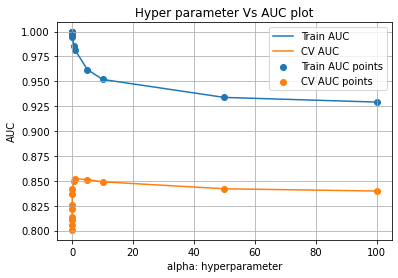

BEST ALPHA:  1                               BEST SCORE:  0.8520106299552364


In [37]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

MltNB_tfidf = MultinomialNB(fit_prior=True,class_prior=[0.5, 0.5])
parameters = {'alpha':[0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]}
clf = GridSearchCV(MltNB_tfidf, parameters, cv= 20, scoring='roc_auc',verbose=1,return_train_score=True)
# clf.fit(x_cv_onehot_bow, y_cv)
clf.fit(X_train_text,y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
#print(results)
results = results.sort_values(['param_alpha'])

train_auc = results['mean_train_score']
train_auc_std = results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std = results['std_test_score']
alpha =  results['param_alpha']

bestAlpha_2 =clf.best_params_['alpha']
bestScore_2 = clf.best_score_

plt.plot(alpha, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(alpha, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(alpha, train_auc, label='Train AUC points')
plt.scatter(alpha, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

results.head()



print("BEST ALPHA: ",bestAlpha_2,"                            "," BEST SCORE: ",bestScore_2) 

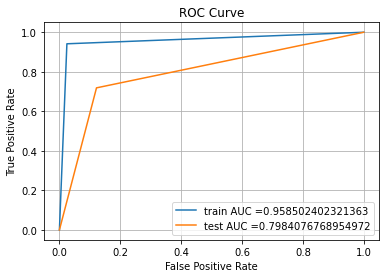

In [38]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


MltNB_tfidf = MultinomialNB(alpha = bestAlpha_2, fit_prior=True, class_prior=[0.5, 0.5])
MltNB_tfidf.fit(X_train_text,y_train)


#neigh = KNeighborsClassifier(n_neighbors=best_k, n_jobs=-1)
#neigh.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = MltNB_tfidf.predict(X_train_text)
y_test_pred = MltNB_tfidf.predict(X_test_text)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

set2_tr_auc = auc(train_fpr, train_tpr)
set2_te_auc = auc(test_fpr, test_tpr)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.grid()
plt.show()

In [39]:
F1_test = f1_score(y_test,y_test_pred,average='weighted')
print(F1_test)

0.8077598426253226


### Training Model using keyword

Fitting 20 folds for each of 14 candidates, totalling 280 fits


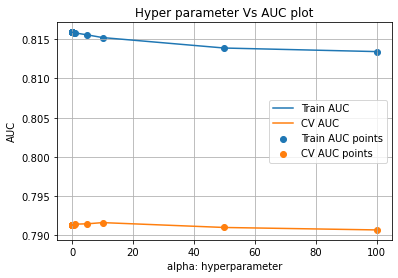

BEST ALPHA:  10                               BEST SCORE:  0.7916235639814356


In [41]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

MltNB_tfidf = MultinomialNB(fit_prior=True,class_prior=[0.5, 0.5])
parameters = {'alpha':[0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]}
clf = GridSearchCV(MltNB_tfidf, parameters, cv= 20, scoring='roc_auc',verbose=1,return_train_score=True)
# clf.fit(x_cv_onehot_bow, y_cv)
clf.fit(X_train_keyword,y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
#print(results)
results = results.sort_values(['param_alpha'])

train_auc = results['mean_train_score']
train_auc_std = results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std = results['std_test_score']
alpha =  results['param_alpha']

bestAlpha_2 =clf.best_params_['alpha']
bestScore_2 = clf.best_score_

plt.plot(alpha, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(alpha, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(alpha, train_auc, label='Train AUC points')
plt.scatter(alpha, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

results.head()



print("BEST ALPHA: ",bestAlpha_2,"                            "," BEST SCORE: ",bestScore_2) 

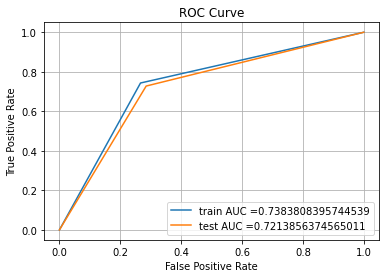

In [42]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


MltNB_tfidf = MultinomialNB(alpha = bestAlpha_2, fit_prior=True, class_prior=[0.5, 0.5])
MltNB_tfidf.fit(X_train_keyword,y_train)


#neigh = KNeighborsClassifier(n_neighbors=best_k, n_jobs=-1)
#neigh.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = MltNB_tfidf.predict(X_train_keyword)
y_test_pred = MltNB_tfidf.predict(X_test_keyword)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

set2_tr_auc = auc(train_fpr, train_tpr)
set2_te_auc = auc(test_fpr, test_tpr)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.grid()
plt.show()

In [43]:
F1_test = f1_score(y_test,y_test_pred,average='weighted')
print(F1_test)

0.721713835508531


### Training Model using Text and Keyword

Fitting 20 folds for each of 14 candidates, totalling 280 fits


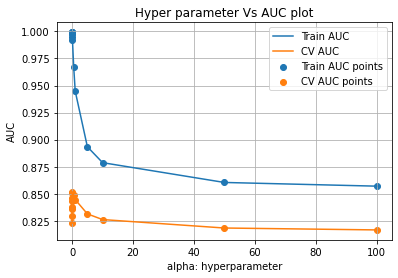

BEST ALPHA:  0.1                               BEST SCORE:  0.8517650302161963


In [44]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

MltNB_tfidf = MultinomialNB(fit_prior=True,class_prior=[0.5, 0.5])
parameters = {'alpha':[0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]}
clf = GridSearchCV(MltNB_tfidf, parameters, cv= 20, scoring='roc_auc',verbose=1,return_train_score=True)
# clf.fit(x_cv_onehot_bow, y_cv)
clf.fit(X_tr,y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
#print(results)
results = results.sort_values(['param_alpha'])

train_auc = results['mean_train_score']
train_auc_std = results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std = results['std_test_score']
alpha =  results['param_alpha']

bestAlpha_2 =clf.best_params_['alpha']
bestScore_2 = clf.best_score_

plt.plot(alpha, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(alpha, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(alpha, train_auc, label='Train AUC points')
plt.scatter(alpha, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

results.head()



print("BEST ALPHA: ",bestAlpha_2,"                            "," BEST SCORE: ",bestScore_2) 

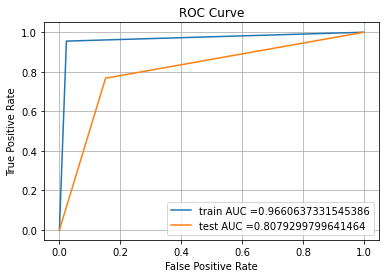

In [45]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


MltNB_tfidf = MultinomialNB(alpha = bestAlpha_2,fit_prior=True)
MltNB_tfidf.fit(X_tr,y_train)


#neigh = KNeighborsClassifier(n_neighbors=best_k, n_jobs=-1)
#neigh.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = MltNB_tfidf.predict(X_tr)
y_test_pred = MltNB_tfidf.predict(X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

set2_tr_auc = auc(train_fpr, train_tpr)
set2_te_auc = auc(test_fpr, test_tpr)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.grid()
plt.show()

In [46]:
F1_test = f1_score(y_test,y_test_pred,average='weighted')
print(F1_test)

0.8132602804590137


## Final Model

In [52]:
# We will use text and keyword features as using these feature f1-score is highest.

In [51]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

clf = MultinomialNB(alpha=0.1,fit_prior=True)
clf.fit(X_tr,y_train)
predicted_values_NB = clf.predict(X_te)
predictions = dict()
accuracy = accuracy_score(y_test, predicted_values_NB)
predictions['Naive Bayes'] = accuracy * 100
confusionmatrix = confusion_matrix(y_test, predicted_values_NB)
print("The accuracy of Naive Bayes clasifier is {}%".format(accuracy * 100))
print("\n", confusionmatrix)
F1_test = f1_score(y_test,predicted_values_NB,average='weighted')
print(F1_test)

The accuracy of Naive Bayes clasifier is 81.36482939632546%

 [[369  66]
 [ 76 251]]
0.8132602804590137


In [48]:
te_pred = clf.predict(te_text)
pred = pd.DataFrame(te_id, columns = ['Id'])
pred['target']=te_pred
pred.head()
pred.to_csv('pred.csv',index=False)